# Image Processing with OpenCV

## Basic Processing

In this notebook, we will learn about some basics of image processing using OpenCV

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Now let's see how image data is presented in OpenCV.

In open CV image is represented as Numpy array. The dimensions of the array are:

- Dimension 1: image vertical coordinate (height)
- Dimension 2: image horizontal coordinate (width)
- Dimension 3: channel R, G, B

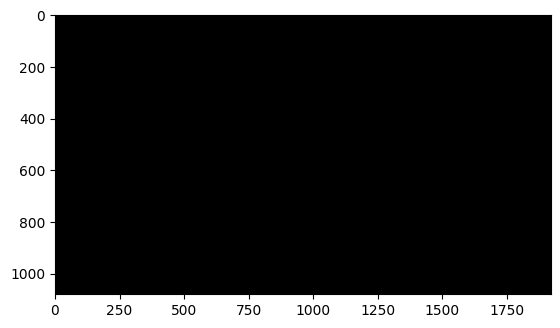

In [ ]:
# in OpenCV image is the same as 3D array with type of np.uint8
# let's try, create a 3D numpy with height 1920 and height 1080 and channel 3
# with all values 0.

image = np.ones((1080, 1920, 3), dtype=np.uint8) * 0
plt.imshow(image)
plt.show()

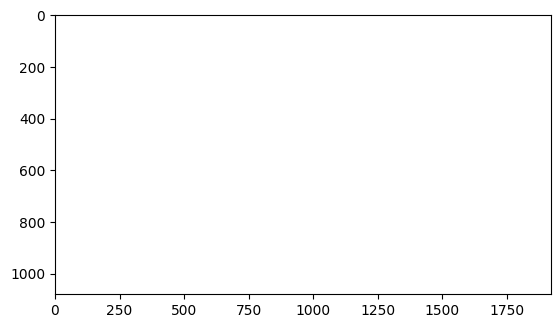

In [ ]:
# if you access image[10, 650, 2] then you will get
# the 10th pixel from top and 650th pixel from left in channel Blue
# Now, let's change all pixels in R channel to 255
# you will se that it will be red

image[:, :, 1] = np.ones((1080, 1920), dtype=np.uint8) * 255
image[:, :, 0] = np.ones((1080, 1920), dtype=np.uint8) * 255
plt.imshow(image)
plt.show()

Of course, you can also load image from file

Image shape (H, W C): (220, 235, 3)


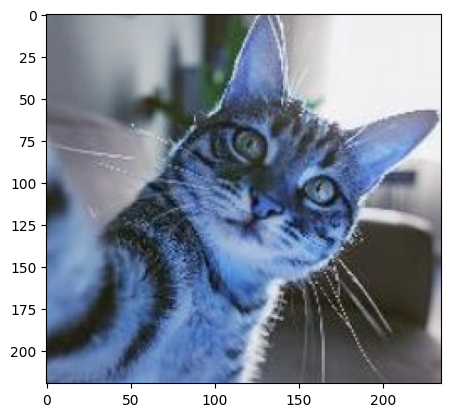

In [ ]:
image = cv2.imread("selfie-cat.jpg")

# check the image size
print("Image shape (H, W C):", image.shape)
# show the image
plt.imshow(image)
plt.show()

An important point is that, OpenCV will load image as BGR.

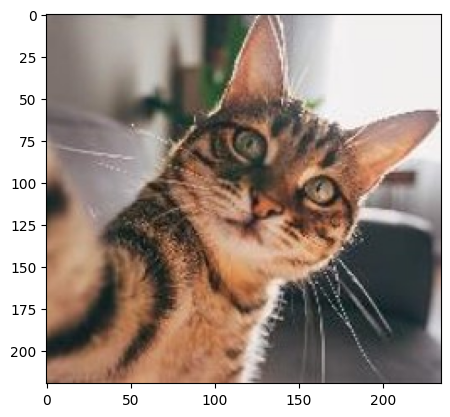

In [ ]:
# convert the image RGB,
# for practice we will do it in manual way

image_rgb = image.copy()
image_rgb[:, :, 0] = image[:, :, 2]
image_rgb[:, :, 1] = image[:, :, 1]
image_rgb[:, :, 2] = image[:, :, 0]

# actually you can do it with (recommended)
# image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.show()

Obviously you can also save image

In [ ]:
# let's modify image, by setting all pixels of Blue channel to 0
# since we only have red and green only, we expect the color to be yellowish
image_modified = image_rgb.copy()
image_modified[:, :, 2] = np.zeros(image_rgb.shape[:2], dtype=np.uint8)

# don't forget to convert back to BGR
image_modified = cv2.cvtColor(image_modified, cv2.COLOR_RGB2BGR)
cv2.imwrite("yellow-cat.jpg", image_modified)

True

You can also make an image blur

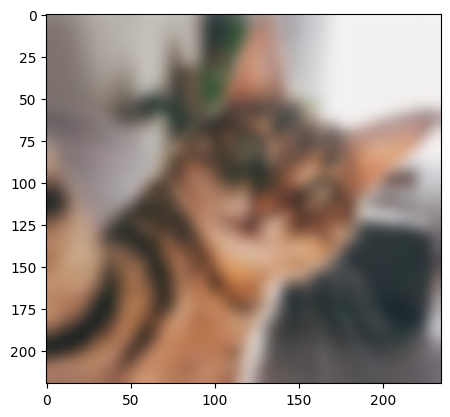

In [ ]:
image_blurred = cv2.GaussianBlur(image_rgb, (51, 51), cv2.BORDER_DEFAULT)
plt.imshow(image_blurred)
plt.show()

Or pixelate it, by resizing the image to small and then to original again

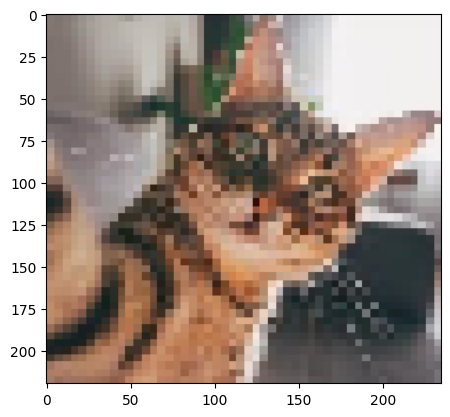

In [ ]:
height, width = image_rgb.shape[:2]
temp = cv2.resize(image_rgb, (50, 50), interpolation=cv2.INTER_LINEAR)
image_pixelated = cv2.resize(temp, (width, height), interpolation=cv2.INTER_NEAREST)
plt.imshow(image_pixelated)
plt.show()

## Red vs Green Apple

Let's build a very simplified classifier that can differentiate between red apple and green apple.

The method is: if the red color > green color, it is classified as red apple. Else, it is classified as green apple.

We will count the color in HSV values. Plese refer the image below to check the hue range. Note that the actual hue values range between 0 - 360. However, the value in OpenCV is divided by half, so the range is 0 - 180 in OpenCV

- Red color resides in hue 160 - 180 and 0 - 20
- Yellow color resides in hue 40 - 80

Technically, **the HSV values is called feature**, and operations to extract the feature from image is called feature extraction.

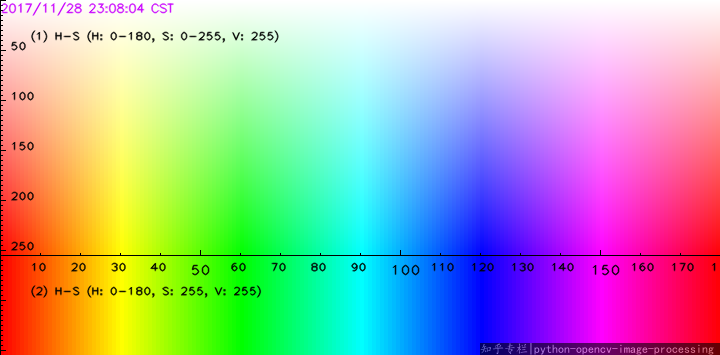

Green Apple


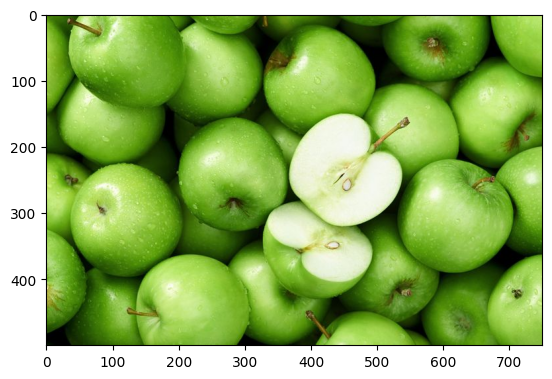

In [ ]:
# load image -> convert to HSV -> get the hue value
image = cv2.imread("apel-hijau-1.jpg")
image_area = image.shape[0] * image.shape[1]
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
image_hues = image_hsv[:, :, 0]

# count number of red and yellow
red_count = np.logical_or(image_hues < 20, image_hues > 160).sum()
green_count = np.logical_and(image_hues > 40, image_hues < 80).sum()

# do classification
if red_count > green_count:
  result = "Red Apple"
else:
  result = "Green Apple"

print(result)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

However you need to know the limitation:
- It won't work if the fruit's color does not deominate the image

## Object Counting

In this experiment, we would like to count coins/objects in general in an image. The approach is very simpified.

We make assumption that the background and the object color is very contrast.

Thus, if the background is bright (white), set white colored pixels as background and set dark colored pixels as object. Now we get the object segmentation.

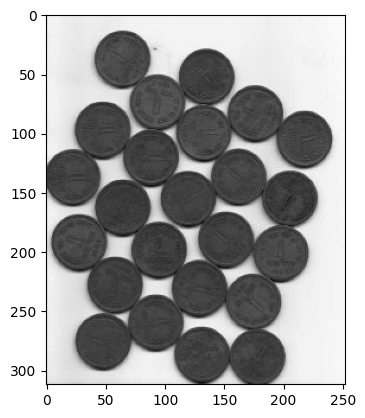

In [ ]:
image = cv2.imread("coins1.jpg")
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

plt.imshow(image_gray, cmap="gray")
plt.show()

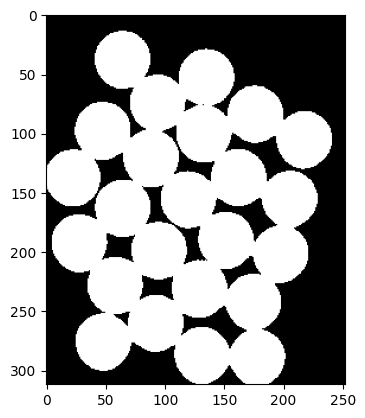

In [ ]:
_,image_binary = cv2.threshold(image_gray,130,255,cv2.THRESH_BINARY_INV)

plt.imshow(image_binary, cmap="gray")
plt.show()

We want to separate each object so we can count them. We can do this by eroding the image.

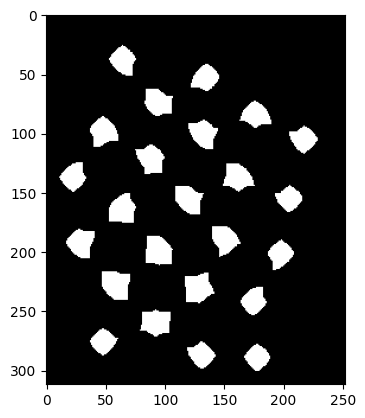

In [ ]:
kernel = np.ones((3, 3), np.uint8)
image_eroded = image_binary.copy()
for _ in range (10):
  image_eroded = cv2.erode(image_eroded, kernel)

plt.imshow(image_eroded, cmap="gray")
plt.show()

Next, use conncected component analysis to get separate object regions. The results of connected component analysis (coin region areas, centroids, etc.) can also be called as feature.

Number of object: 24


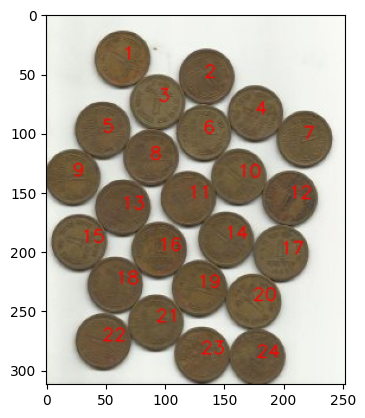

In [ ]:
num_labels, _, _, centroids = cv2.connectedComponentsWithStats(image_eroded, 4, cv2.CV_32S)
print(f"Number of object: {num_labels - 1}")

visualization = image.copy()
for i, center in enumerate(centroids[1:]):
  visualization = cv2.putText(
    visualization,
    str(i + 1),
    (int(center[0]), int(center[1])),
    cv2.FONT_HERSHEY_SIMPLEX ,
    0.5,
    (0, 0, 255),
    1,
    cv2.LINE_AA
  )
plt.imshow(cv2.cvtColor(visualization, cv2.COLOR_BGR2RGB))
plt.show()

However, the limitation:
- The object must be perfectly contrast with the background, at all part.